# Plotting Titanic Datasets
<b> Name : Deepak Gautam </b> <br />
<b> NetID: dg1308 </b>

In [146]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import pandas as pd

In [147]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")

###  Bar chart for number of passengers survived by class

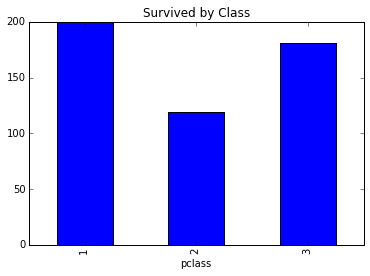

In [148]:
data1=titanic.groupby('pclass').survived.sum()
data1.plot(kind='bar', title='Survived by Class')

### Vertical bar chart for passengers survived by class and gender

Pivot table is created with index pclass and columns as a values of sex with their values as values of survived column.

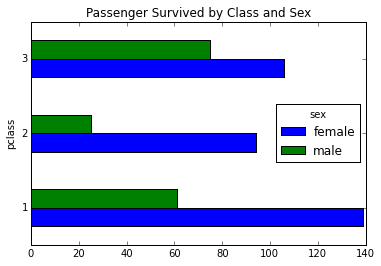

In [149]:
data2 = titanic.pivot_table(index=['pclass'],columns='sex',values='survived',aggfunc=np.sum)
data2.plot(kind='barh', title='Passenger Survived by Class and Sex')

### Stacked chart survived vs dead for different classes and gender

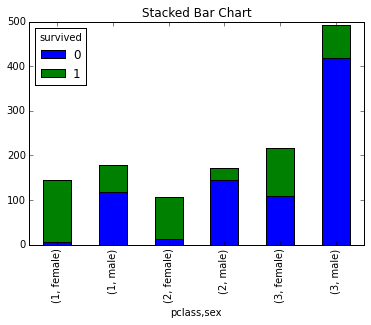

In [150]:
data3 = pd.crosstab([titanic.pclass,titanic.sex], titanic.survived)
data3.plot(kind='bar',stacked=True,title='Stacked Bar Chart')

### Histogram of fares paid for passengers with bins = 30

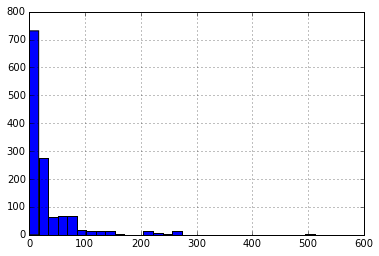

In [151]:
titanic.fare.hist(bins=30)

### KDE vs bar plot of the fares of the passengers

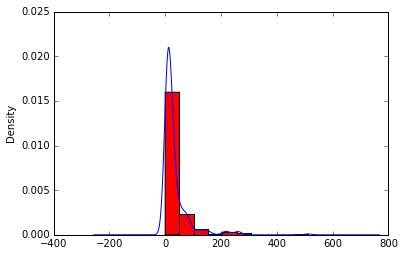

In [152]:
titanic.fare.hist(bins=10,normed=True,color='r')
titanic.fare.dropna().plot(kind='kde')

### Boxplot for the fares paid according to passenger's class. 

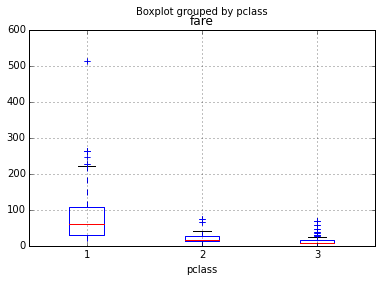

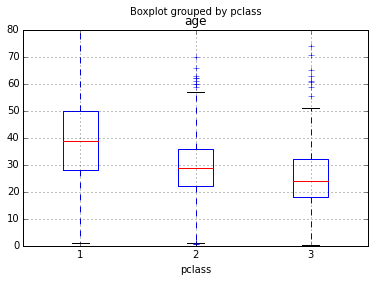

In [153]:
titanic.boxplot(column='fare',by='pclass')
titanic.boxplot(column='age',by='pclass')

## All of the plots above plotted by using plotly library.

In [154]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
from credentials import *
import cufflinks as cf
py.sign_in('dg1308', 'era39q3eew')

### Bar plot using plotly 

Here data1 is the dataframe which was used to plot same bar plot using matplotlib.

In [155]:
data1.iplot(kind='bar')

/home/dg/Documents/MSU/big-data/big-data-env/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



### Bar plot using plotly 

Here data2 is the dataframe which was used to plot same vertical bar chart plot using matplotlib.

In [156]:
data2.iplot(kind='barh')

/home/dg/Documents/MSU/big-data/big-data-env/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



### Stacked bar chart of passenger survived by class and sex.
The class column is applied to be converted into strings to matchup with sex column values.

In [145]:
titanicCopy = titanic.copy()
titanicCopy['pclass']=titanicCopy['pclass'].apply(str)
data=pd.crosstab([titanicCopy.pclass, titanicCopy.sex], titanicCopy.survived.astype(bool))
data.iplot(kind='bar',barmode='stack')

/home/dg/Documents/MSU/big-data/big-data-env/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



### Histogram using plotly with bins size 30. 

In [134]:
titanic.fare.iplot(kind='histogram', bins=30, title='Histogram with bins size 30')

/home/dg/Documents/MSU/big-data/big-data-env/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



### KDE vs Bar chart for the fares paid by passengers. 
The NaN values are removed from the numpy array as plotly doesn't allow NaN in the plot data.

In [140]:
from plotly.tools import FigureFactory as FF
x=titanic.fare.values
x = x[np.logical_not(np.isnan(x))]
data=[x]
labels=['fares']
fig=FF.create_distplot(data,labels)
py.iplot(fig,validate=False)

/home/dg/Documents/MSU/big-data/big-data-env/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



### Box plot of passenger fare by class
The fare data is grouped based on classes. There for each class the trace is created. The plotly data is set of traces which is passed while ploting figure.

In [141]:
color = '#ab2232'

data= titanic[['pclass','fare']]
data1 = data[data['pclass']== 1]
data2 = data[data['pclass']== 2]
data3 = data[data['pclass']== 3]

def trace(y, name):
    return Box(
        y=y,        
        name=name, 
        line=Line(color=color) 
    )

data = Data([
    trace(data1.fare, 'Class 1'),
    trace(data2.fare, 'Class 2'),
    trace(data3.fare, 'Class 3')
])

layout = Layout(
    title='Box Plot: Fare by Passenger Class',
    yaxis=YAxis(title='Fare'),
    showlegend=False
)

fig = Figure(data=data, layout=layout)
py.iplot(fig)

/home/dg/Documents/MSU/big-data/big-data-env/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.

